# Example binary fit

Fitting method

- Read data
- Create `A` component
- Fit `A` component
- Create a residual star (`B`)
- Fit `B` component
- Plot and save logs

## Quick fit

01:07:39 ----- WARNING  ----- estimate_runtime
Calculating chi2: ETA ~ 0 s
01:07:40 ----- WARNING  ----- get_parameters_from_chi2_minimization
Based on chi2, I recommend removal of following filters: ['KPNO/Mosaic.I']; chi2=[105.36663391]
01:07:40 ----- WARNING  ----- estimate_runtime
Calculating chi2: ETA ~ 0 s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


01:07:41 ----- WARNING  ----- get_parameters_from_chi2_minimization
Based on chi2, I recommend removal of following filters: ['KPNO/Mosaic.I']; chi2=[105.83209209]


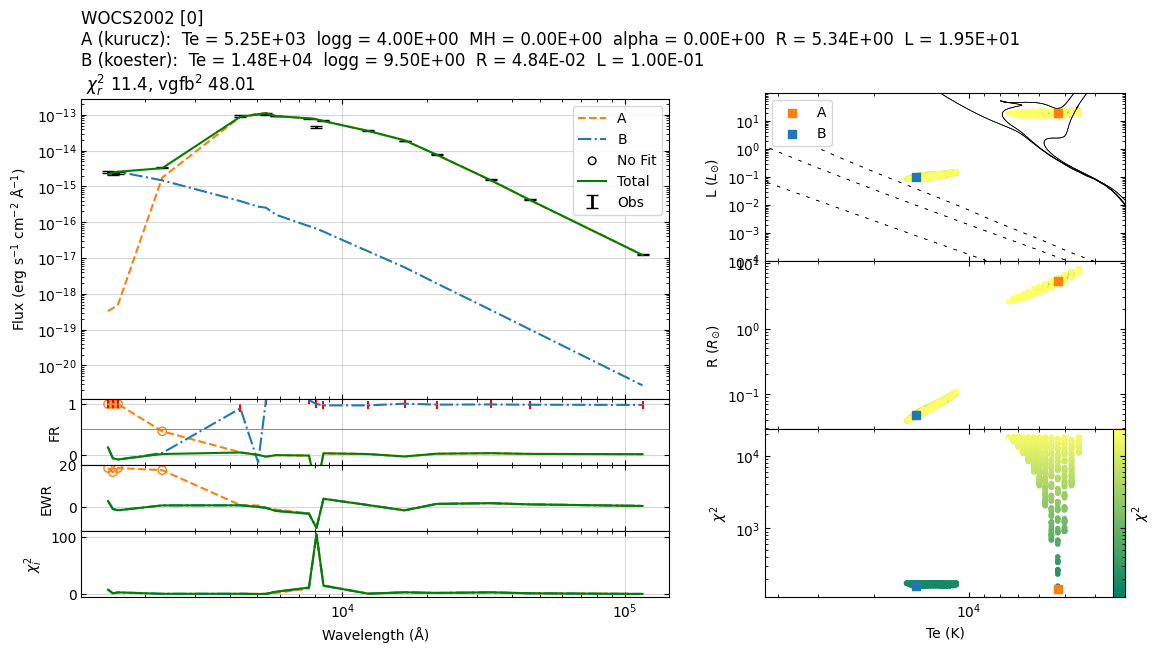

In [2]:
import src.binary_sed_fitting as bsf
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc
################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model_A = bsf.Model(model_name, limits=limits)

model_name = 'koester'
limits = {'Te'   : [5000,80000],
          'logg' : [ 6.5,  9.5]}
model_B = bsf.Model(model_name, limits=limits)
################################################################################
star_system = bsf.System(name=name,
                         distance=distance,
                         e_distance=e_distance,
                         data=data)
################################################################################
star_system.setup_A_component(model=model_A, 
                              wavelength_range=[3000, 1_000_000_000],
                              r_limits='blackbody')

star_system.A.fit_chi2()
################################################################################
star_system.create_residual_star(component='B', 
                                 model=model_B,
                                 wavelength_range=[0, 1_000_000_000], 
                                 r_limits=[0.001,1.0])
star_system.B.fit_chi2()
################################################################################
star_system.plot()

## Recommended fitting routine

- `System`
    - Setting up the system using `data`, `filters_to_drop`, `name` etc.

- `setup_A_component`
    - Set up the A component of the system.
    - Provide appropriate `model`, `wavelength_range` and `r_limits`

- `create_residual_star`
    - Create a residual star object for a specific component based on residual flux.
    - Provide appropriate `model`, `wavelength_range` and `r_limits`

- `save_summary`
    - Save a summary of the current state of the instance to a CSV file.

### Example 1

01:07:42 ----- WARNING  ----- calculate_chi2
Give "refit=True" if you want to rerun the fitting process.
01:07:42 ----- WARNING  ----- estimate_runtime
Calculating noisy chi2: ETA ~ 2 s
01:07:45 ----- WARNING  ----- calculate_chi2
Give "refit=True" if you want to rerun the fitting process.
01:07:45 ----- WARNING  ----- estimate_runtime
Calculating noisy chi2: ETA ~ 5 s
01:07:50 ----- WARNING  ----- get_realistic_errors_from_iterations
logg_B : The best fit value is at upper limit of the model.
01:07:50 ----- WARNING  ----- get_parameters_from_noisy_chi2_minimization
Te_B (14750) != Te_median_B (14500) : Proceed with caution!


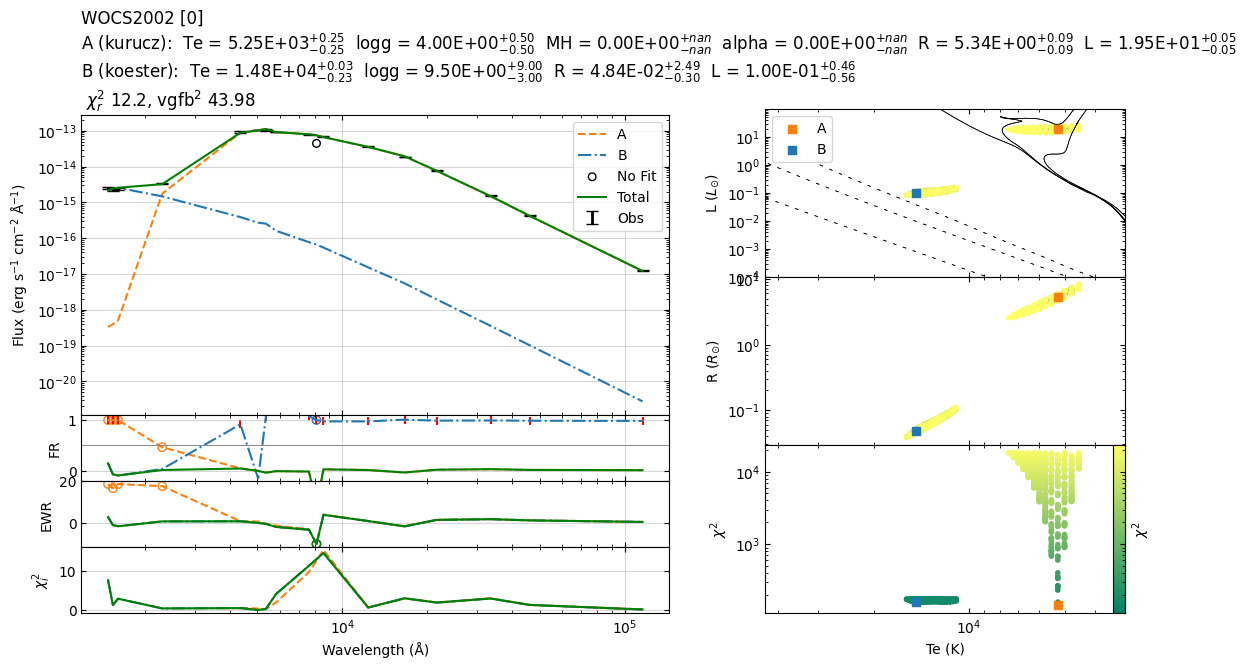

In [3]:
import src.binary_sed_fitting as bsf
import importlib
importlib.reload(bsf)
import warnings
warnings.filterwarnings("ignore")
bsf.console.setLevel(bsf.logging.WARNING)
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit    = False
run_name = '0'
################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model_A = bsf.Model(model_name, limits=limits)

model_name = 'koester'
limits = {'Te'   : [5000, 80000],
          'logg' : [ 6.5,  9.5]}
model_B = bsf.Model(model_name, limits=limits)
################################################################################
star_system = bsf.System(name=name,
                        distance=distance,
                        e_distance=e_distance,
                        data=data,
                        run_name=run_name,
                        filters_to_drop=['KPNO/Mosaic.I'])
################################################################################
star_system.setup_A_component(model=model_A, 
                              wavelength_range=[3000, 1_000_000_000],
                              r_limits='blackbody')

star_system.A.fit_chi2(refit=refit)
star_system.A.fit_noisy_chi2(refit=refit)
################################################################################
star_system.create_residual_star(component='B', 
                                 model=model_B,
                                 wavelength_range=[0, 1_000_000_000], 
                                 r_limits=[0.001,1.0])
star_system.B.fit_chi2(refit=refit)
star_system.B.fit_noisy_chi2(refit=refit)
################################################################################
star_system.plot(add_noisy_seds=False, 
                FR_cutoff=0.5,
                folder='plots/')
star_system.save_summary()

### Example 2

01:07:52 ----- INFO     ----- __init__
--------------------------------------------------------------
------------            WOCS2002 Total            ------------
--------------------------------------------------------------
01:07:52 ----- INFO     ----- drop_filters
                            Fitted     Not fitted
wavelength                                       
1481.000000    Astrosat/UVIT.F148W               
1541.000000    Astrosat/UVIT.F154W               
1608.000000    Astrosat/UVIT.F169M               
2303.366368        GALEX/GALEX.NUV               
4357.276538          KPNO/Mosaic.B               
5035.750275         GAIA/GAIA3.Gbp               
5366.240786          KPNO/Mosaic.V               
5822.388714           GAIA/GAIA3.G               
7619.959993         GAIA/GAIA3.Grp               
8101.609574                         KPNO/Mosaic.I
8578.159519        GAIA/GAIA3.Grvs               
12350.000000         2MASS/2MASS.J               
16620.000000         2MASS/2M

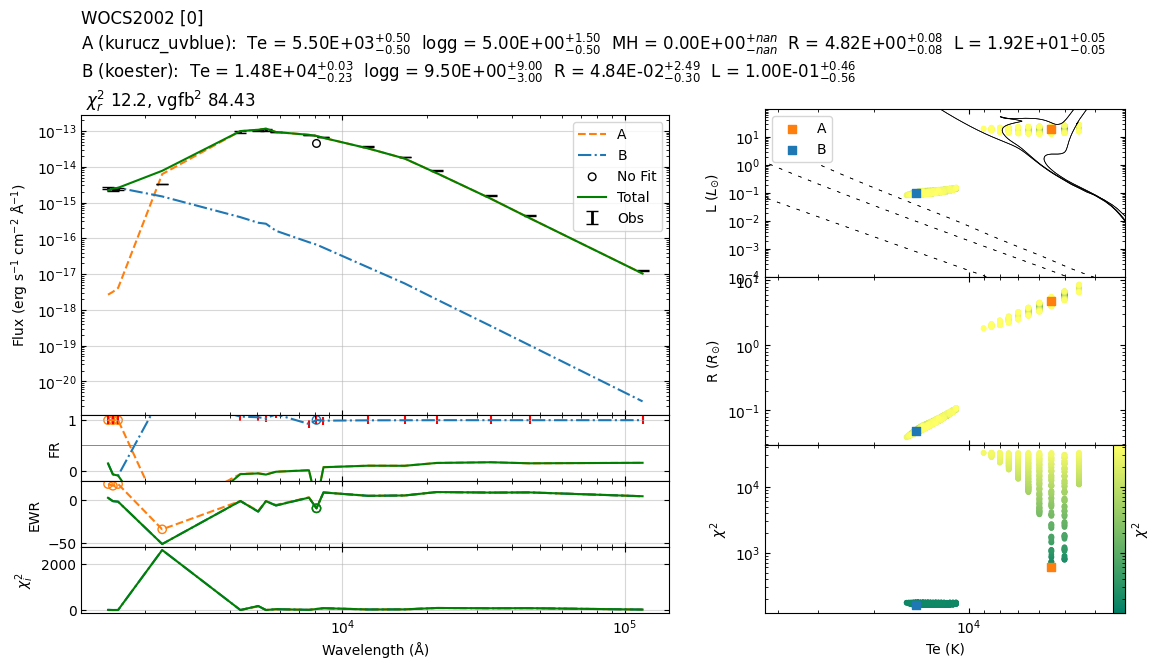

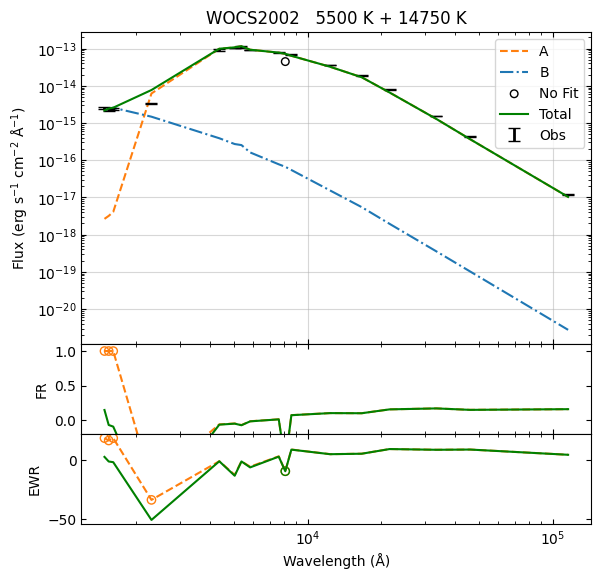

In [4]:
import src.binary_sed_fitting as bsf
import importlib
importlib.reload(bsf)
import warnings
warnings.filterwarnings("ignore")
bsf.console.setLevel(bsf.logging.INFO)
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit    = False
run_name = '0'
################################################################################
model_name = 'kurucz_uvblue'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0]}
model_A = bsf.Model(model_name, limits=limits)

model_name = 'koester'
limits = {'Te'   : [5000, 80000],
          'logg' : [ 6.5,  9.5]}
model_B = bsf.Model(model_name, limits=limits)
################################################################################
star_system = bsf.System(name=name,
                        distance=distance,
                        e_distance=e_distance,
                        data=data,
                        run_name=run_name,
                        filters_to_drop=['KPNO/Mosaic.I'])
################################################################################
star_system.setup_A_component(model=model_A, 
                              wavelength_range=[3000, 1_000_000_000],
                              r_limits='blackbody')

star_system.A.fit_chi2(refit=refit)
star_system.A.fit_noisy_chi2(refit=refit)
################################################################################
star_system.create_residual_star(component='B', 
                                 model=model_B,
                                 wavelength_range=[0, 1_000_000_000], 
                                 r_limits=[0.001,1.0])
star_system.B.fit_chi2(refit=refit)
star_system.B.fit_noisy_chi2(refit=refit)
################################################################################
star_system.plot(add_noisy_seds=False, 
                FR_cutoff=0.5,
                folder='plots/')
star_system.plot_public(add_noisy_seds=False, 
                        median=False, 
                        folder='plots/')
star_system.save_summary()

## Advance options

- Each component in a System can be accessed and processed as a seperate Star
- 3rd component can be fitted by creating a residual star after fitting A and B components.
    - Potentially, any number of components can be fitted. But none of the plotting functions are designed to deal with more than 3.
- `System.Total`
    - `Star` object representing the total fitted flux.

                      wavelength          flux         error  error_fraction  \
FilterID                                                                       
Astrosat/UVIT.F148W  1481.000000  2.548070e-15  1.361179e-16        0.053420   
Astrosat/UVIT.F154W  1541.000000  2.285731e-15  1.368403e-16        0.059867   
Astrosat/UVIT.F169M  1608.000000  2.360782e-15  1.261129e-16        0.053420   
GALEX/GALEX.NUV      2303.366368  3.296702e-15  8.677147e-17        0.026321   
KPNO/Mosaic.B        4357.276538  9.309407e-14  6.130611e-15        0.065854   

                     error_2percent  error_10percent  log_wavelength  \
FilterID                                                               
Astrosat/UVIT.F148W    1.361179e-16     2.548070e-16        3.170555   
Astrosat/UVIT.F154W    1.368403e-16     2.285731e-16        3.187803   
Astrosat/UVIT.F169M    1.261129e-16     2.360782e-16        3.206286   
GALEX/GALEX.NUV        8.677147e-17     3.296702e-16        3.362363   
KPNO/Mo

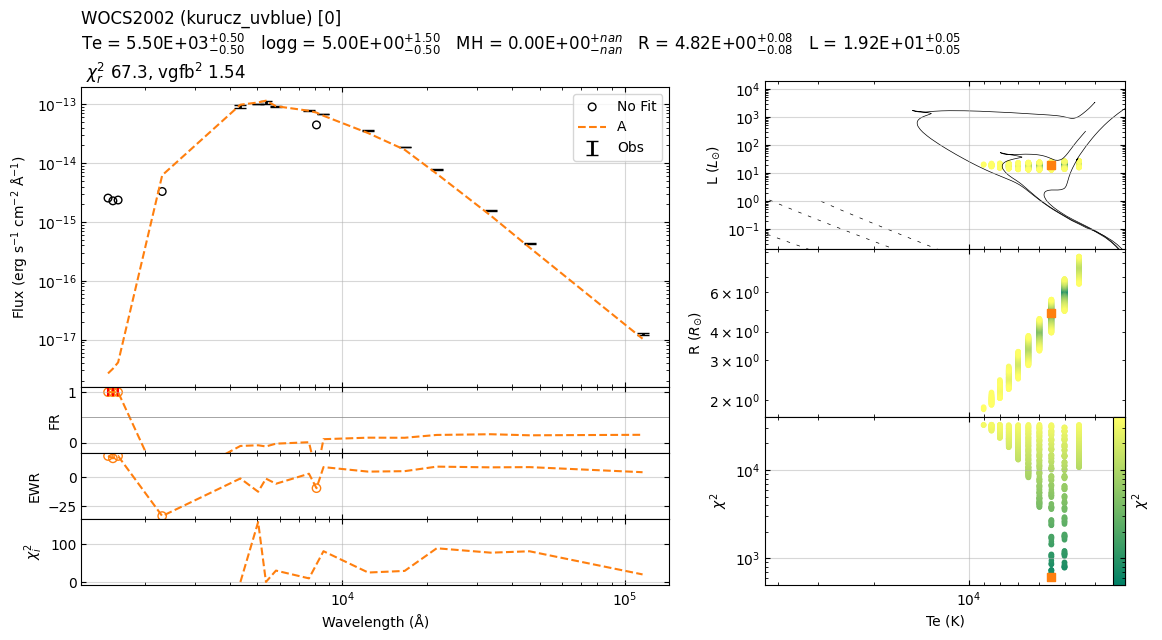

In [5]:
star_system.A.plot()

print(star_system.Total.data_all.head())